# Exploring Air Traffic Data of Germany - v02

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = 1000

## Import data

In [3]:
path = '../data/'

In [4]:
df_geo = pd.read_csv(path + 'world_airports.csv')

In [5]:
df_raw = pd.read_csv(path + 'flight_data_de_distance.csv')

In [6]:
df_raw.head()

,route,fr_country,fr_airport,to_country,to_airport,month,flight_d,seat_d,passenger_d,distance
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,646.455762
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,1306.358290
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,869.238264
3,DE_EDDB_CH_LSZM,DE,EDDB,CH,LSZM,2019-11-01,45.0,7372.0,6341.0,NaN
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,472.646160


In [7]:
col_names = {
    # 'route': 'flight',
    'flight_d': 'num_flights',
    'seat_d': 'seats',
    'passenger_d': 'passengers',
    'month': 'date'
}

In [8]:
df = df_raw.rename(columns=col_names)

In [9]:
df.shape

(161011, 10)

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df = df.assign(util_rate = df['passengers'] / df['seats'])

In [12]:
df = df.assign(domestic=(df['fr_country'] == df['to_country']).astype(int)) 

In [13]:
df.head()

,route,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,distance,util_rate,domestic
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,646.455762,0.894685,0
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,1306.358290,0.896622,0
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,869.238264,0.834093,0
3,DE_EDDB_CH_LSZM,DE,EDDB,CH,LSZM,2019-11-01,45.0,7372.0,6341.0,NaN,0.860147,0
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,472.646160,0.218750,1


## Data Exploration

### Evolution of num_flights

#### Overall

/home/tae/anaconda3/envs/ironhack/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


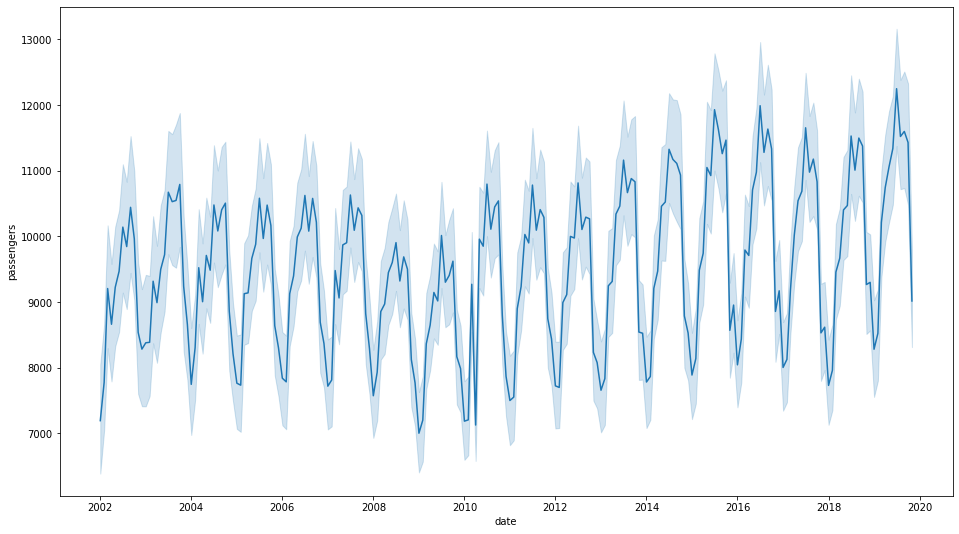

In [14]:
fig, ax = plt.subplots(figsize=(16,9))

ax = sns.lineplot(x=df['date'],
                  y=df['passengers'] # df['num_flights']
                 )

#### Domestic vs International

In [15]:
df_temp = df.copy()

In [16]:
df_temp['passengers'] = np.where(df_temp['domestic'] == 1, df_temp['passengers'] / 2, df_temp['passengers'])

In [17]:
df_temp_group = df_temp[["date","domestic","passengers"]].groupby(by=["date","domestic"]).mean()

In [18]:
df_temp_group = df_temp_group.reset_index()

In [19]:
df_temp_group

,date,domestic,passengers
0,2002-01-01,0,5887.722222
1,2002-01-01,1,5435.455224
2,2002-02-01,0,6536.050000
3,2002-02-01,1,5642.798507
4,2002-03-01,0,8090.242500
5,2002-03-01,1,6265.305970
6,2002-04-01,0,7290.362963
7,2002-04-01,1,6400.082090
8,2002-05-01,0,8224.870192
9,2002-05-01,1,6161.376866


In [20]:
di = {
    0: 'international',
    1: 'domestic'
}

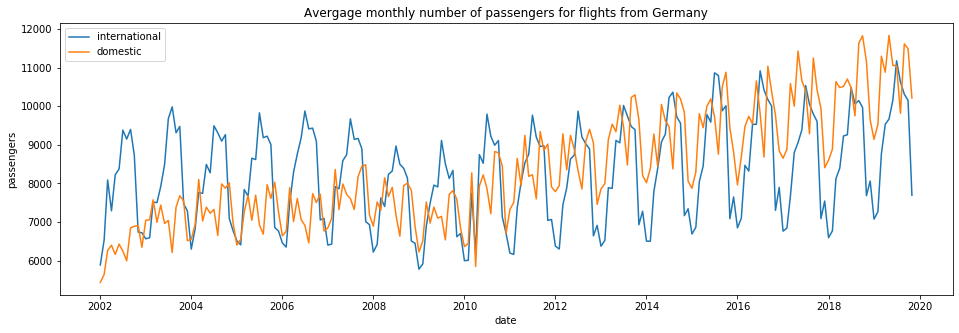

In [21]:
fig, ax = plt.subplots(figsize=(16,5))

ax = sns.lineplot(data = df_temp_group,
                  x='date',
                  y='passengers',#, # df['num_flights'],
                  hue='domestic'#.replace(di)
                 );
ax.set_title("Avergage monthly number of passengers for flights from Germany");
ax.legend(("international","domestic"));

[(5000, 12000)]

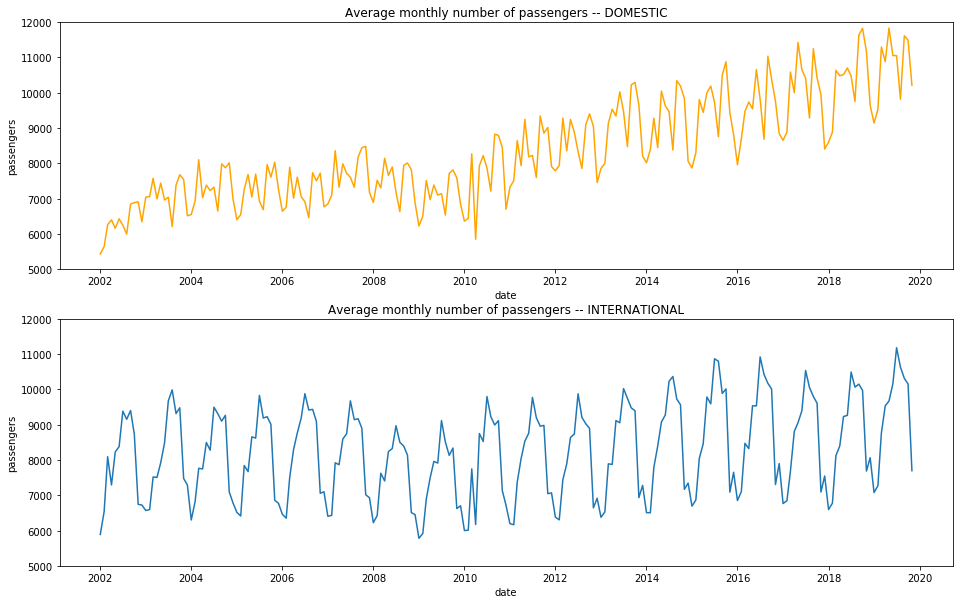

In [27]:
fig, ax = plt.subplots(2,1,figsize=(16,10))

sns.lineplot(data = df_temp_group.loc[df_temp_group["domestic"]==1,:],
                  x='date',
                  y='passengers',
                 color = "orange",
                    ax=ax[0]);

ax[0].set_title("Average monthly number of passengers -- DOMESTIC");
ax[0].set(ylim=[5000,12000])


sns.lineplot(data = df_temp_group.loc[df_temp_group["domestic"]==0,:],
                  x='date',
                  y='passengers', ax = ax[1]);

ax[1].set_title("Average monthly number of passengers -- INTERNATIONAL");
ax[1].set(ylim=[5000,12000])


In [23]:
ax[0]

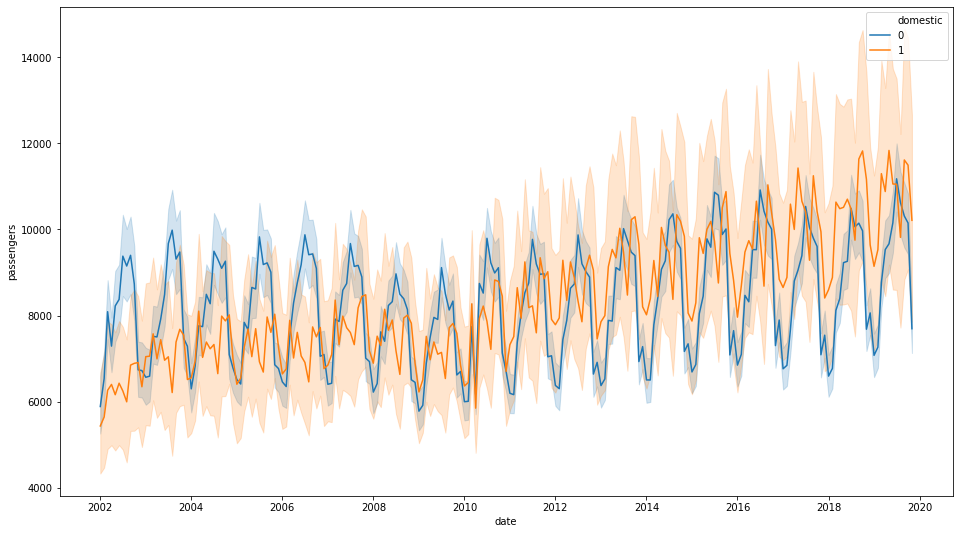

In [24]:
fig, ax = plt.subplots(figsize=(16,9))

ax = sns.lineplot(x=df_temp['date'],
                  y=df_temp['passengers'], # df['num_flights'],
                  hue=df_temp['domestic']
                 )

#### Within 2018 (seasonality)

In [19]:
df_2018 = df_temp[df_temp['date'].dt.year == 2018]

In [74]:
df_2018 = df[df['date'].dt.year == 2018]

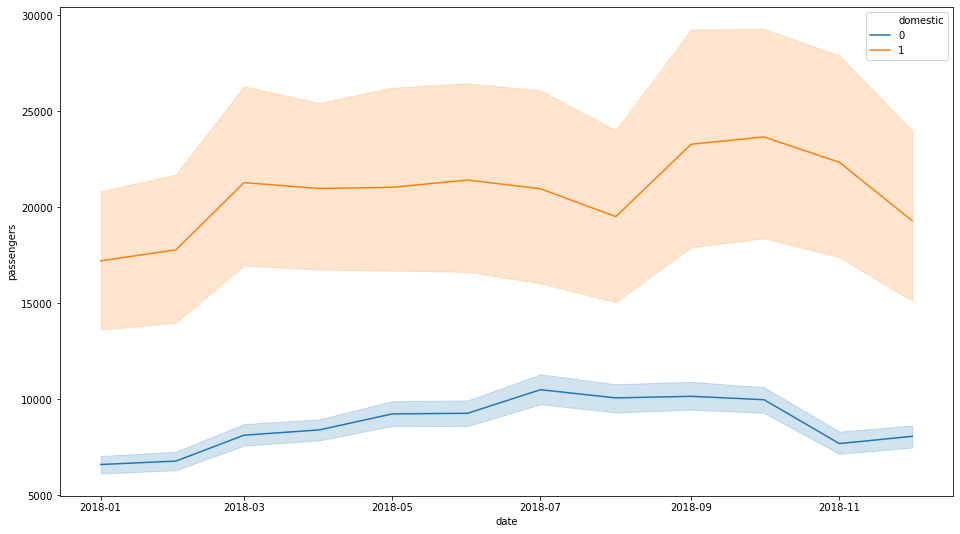

In [21]:
fig, ax = plt.subplots(figsize=(16,9))

ax = sns.lineplot(x=df_2018['date'],
                  y=df_2018['passengers'], # df_2018['num_flights'],
                  hue=df_2018['domestic']
                 )

In [91]:
df_temp = df.copy()
df_temp['passengers'] = np.where(df_temp['domestic'] == 1, df_temp['passengers'] / 2, df_temp['passengers'])

df_2018_group = df_temp.loc[df['date'].dt.year == 2018,["date","passengers","domestic"]].groupby(by=["date","domestic"]).mean().reset_index()

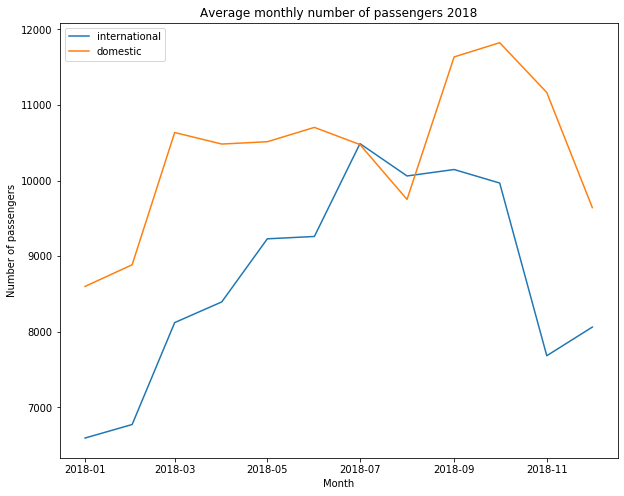

In [104]:
fig, ax = plt.subplots(figsize=(10,8))


ax = sns.lineplot(data = df_2018_group,
                  x='date',
                  y='passengers',#, # df['num_flights'],
                  hue='domestic'#.replace(di)
                 );
ax.set(xlabel = "Month",
       ylabel = "Number of passengers",
       title = "Average monthly number of passengers 2018")


ax.legend(("international","domestic"));

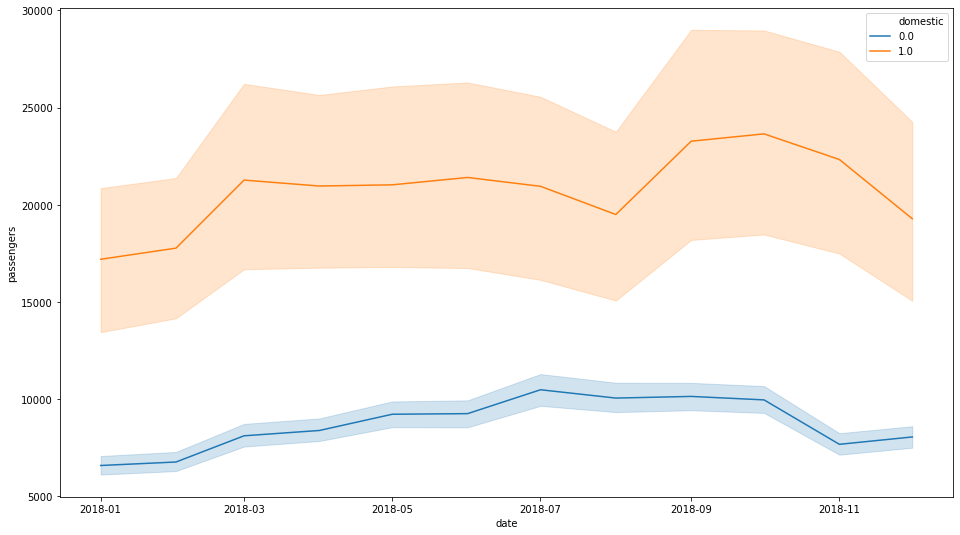

In [22]:
fig, ax = plt.subplots(figsize=(16,9))

ax = sns.lineplot(x=df_2018['date'],
                  y=df['passengers'], # df_2018['num_flights'],
                  hue=df_2018['domestic']
                 )

#### Compare 2016-2018

In [23]:
df_3y = df[(df['date'].dt.year >= 2016) & (df['date'].dt.year <= 2018)]

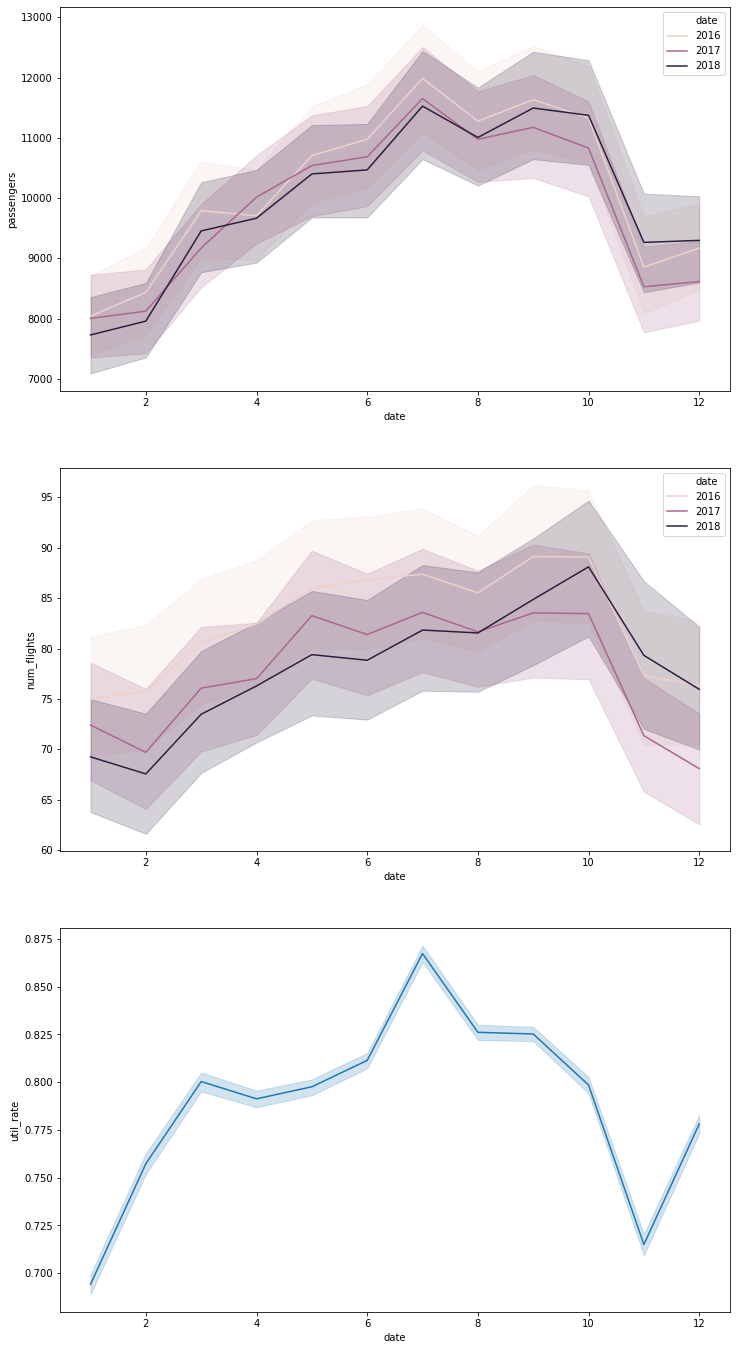

In [24]:
fig, ax = plt.subplots(3, 1, figsize=(12,24))

sns.lineplot(x=df_3y['date'].dt.month,
             y=df_3y['passengers'], # df_3y['num_flights'],
             hue=df_3y['date'].dt.year, 
             ax=ax[0]
            );

sns.lineplot(x=df_3y['date'].dt.month,
             y=df_3y['num_flights'],
             hue=df_3y['date'].dt.year, 
             ax=ax[1]
            );

sns.lineplot(x=df_3y['date'].dt.month,
             y=df_3y['util_rate'],
             ax=ax[2]
            );

#### Compare Tegel and Schönefeld

Dataframe with flights departing or arriving in Berlin (i.e., Tegel or Schönefeld): `df_bln`

In [25]:
df_bln = df[(df['fr_airport'].isin(['EDDT', 'EDDB'])) | (df['to_airport'].isin(['EDDT', 'EDDB']))]

In [26]:
df_bln.head(300)

,route,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,distance,util_rate,domestic
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,646.455762,0.894685,0
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,1306.358290,0.896622,0
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,869.238264,0.834093,0
3,DE_EDDB_CH_LSZM,DE,EDDB,CH,LSZM,2019-11-01,45.0,7372.0,6341.0,NaN,0.860147,0
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,472.646160,0.218750,1
5,DE_EDDB_DK_EKCH,DE,EDDB,DK,EKCH,2019-11-01,62.0,10473.0,8753.0,364.838246,0.835768,0
6,DE_EDDB_EL_LGAV,DE,EDDB,EL,LGAV,2019-11-01,28.0,5122.0,4159.0,1798.003015,0.811988,0
7,DE_EDDB_EL_LGTS,DE,EDDB,EL,LGTS,2019-11-01,27.0,4968.0,3946.0,1502.120328,0.794283,0
8,DE_EDDB_ES_GCTS,DE,EDDB,ES,GCTS,2019-11-01,23.0,4308.0,3921.0,3672.588688,0.910167,0
9,DE_EDDB_ES_LEBL,DE,EDDB,ES,LEBL,2019-11-01,96.0,17222.0,15668.0,1506.066516,0.909767,0


In [27]:
df_bln['airport'] = np.where(df_bln['fr_airport'].eq('EDDT'), 'EDDT', np.NaN)
df_bln['airport'] = np.where(df_bln['fr_airport'].eq('EDDB'), 'EDDB', df_bln['airport'])
df_bln['airport'] = np.where(df_bln['to_airport'].eq('EDDT'), 'EDDT', df_bln['airport'])
df_bln['airport'] = np.where(df_bln['to_airport'].eq('EDDB'), 'EDDB', df_bln['airport'])

/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [28]:
df_bln.head(50)

,route,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,distance,util_rate,domestic,airport
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,646.455762,0.894685,0,EDDB
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,1306.358290,0.896622,0,EDDB
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,869.238264,0.834093,0,EDDB
3,DE_EDDB_CH_LSZM,DE,EDDB,CH,LSZM,2019-11-01,45.0,7372.0,6341.0,NaN,0.860147,0,EDDB
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,472.646160,0.218750,1,EDDB
5,DE_EDDB_DK_EKCH,DE,EDDB,DK,EKCH,2019-11-01,62.0,10473.0,8753.0,364.838246,0.835768,0,EDDB
6,DE_EDDB_EL_LGAV,DE,EDDB,EL,LGAV,2019-11-01,28.0,5122.0,4159.0,1798.003015,0.811988,0,EDDB
7,DE_EDDB_EL_LGTS,DE,EDDB,EL,LGTS,2019-11-01,27.0,4968.0,3946.0,1502.120328,0.794283,0,EDDB
8,DE_EDDB_ES_GCTS,DE,EDDB,ES,GCTS,2019-11-01,23.0,4308.0,3921.0,3672.588688,0.910167,0,EDDB
9,DE_EDDB_ES_LEBL,DE,EDDB,ES,LEBL,2019-11-01,96.0,17222.0,15668.0,1506.066516,0.909767,0,EDDB


In [29]:
df_bln_2018 = df_bln[df_bln['date'].dt.year == 2018]

In [32]:
di_airports = {
    'EDDT': 'Berlin-Tegel',
    'EDDB': 'Berlin-Schönefeld',
    'EDDP': 'Leipzig',
    'EDDM': 'Munich',
    'EDDF': 'Frankfurt'
}

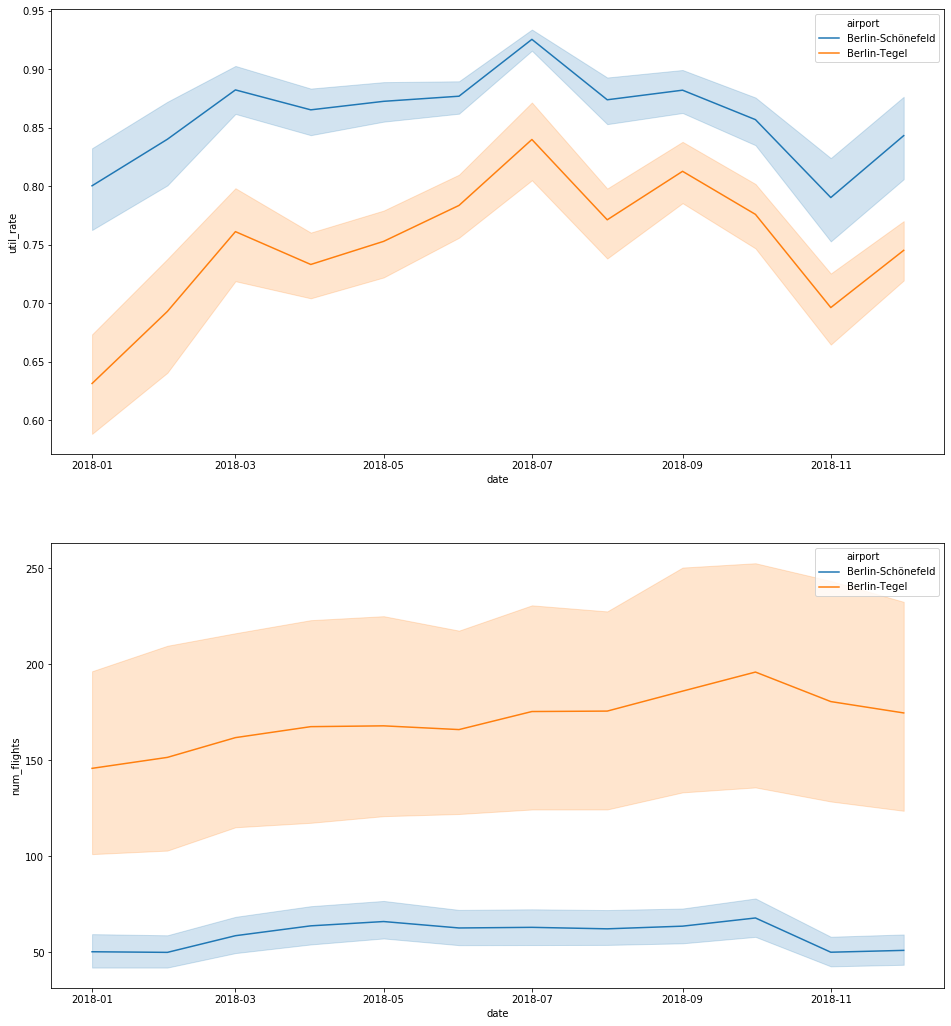

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(16,18))

sns.lineplot(x=df_bln_2018['date'],
             y=df_bln_2018['util_rate'],
             hue=df_bln_2018['airport'].replace(di_airports),
             ax=ax[0]
            )

sns.lineplot(x=df_bln_2018['date'],
             y=df_bln_2018['num_flights'],
             hue=df_bln_2018['airport'].replace(di_airports),
             ax=ax[1]
            );


#### Compare seasonality between cities: Berlin, Munich, Frankfurt, Leipzig

In [34]:
list(di_airports.keys())

['EDDT', 'EDDB', 'EDDP', 'EDDM', 'EDDF']

In [35]:
df_bln['to_airport'].eq('EDDB')

0         False
1         False
2         False
3         False
4         False
          ...  
160945    False
160946    False
160947    False
160948    False
160949    False
Name: to_airport, Length: 17587, dtype: bool

In [36]:
df_cities = df[(df['fr_airport'].isin(list(di_airports.keys()))) | (df['to_airport'].isin(list(di_airports.keys())))]

In [37]:
df_cities['airport'] = np.NaN

/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_cities.head()

,route,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,distance,util_rate,domestic,airport
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,646.455762,0.894685,0,NaN
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,1306.358290,0.896622,0,NaN
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,869.238264,0.834093,0,NaN
3,DE_EDDB_CH_LSZM,DE,EDDB,CH,LSZM,2019-11-01,45.0,7372.0,6341.0,NaN,0.860147,0,NaN
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,472.646160,0.218750,1,NaN


In [39]:
df_cities['airport'] = np.where(df_cities['airport'].isna(), df_cities['fr_airport'].map(di_airports), df_cities['airport'])
df_cities['airport'] = np.where(df_cities['airport'].isna(), df_cities['to_airport'].map(di_airports), df_cities['airport'])


/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/cbineyti/opt/anaconda3/envs/code_red/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
df_cities.head()

,route,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,distance,util_rate,domestic,airport
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,646.455762,0.894685,0,Berlin-Schönefeld
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,1306.358290,0.896622,0,Berlin-Schönefeld
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,869.238264,0.834093,0,Berlin-Schönefeld
3,DE_EDDB_CH_LSZM,DE,EDDB,CH,LSZM,2019-11-01,45.0,7372.0,6341.0,NaN,0.860147,0,Berlin-Schönefeld
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,472.646160,0.218750,1,Berlin-Schönefeld


In [41]:
df_cities_2018 = df_cities[df_cities['date'].dt.year == 2018]

In [42]:
df_cities_3y = df_cities[df_cities['date'].dt.year.between(2016, 2019)]

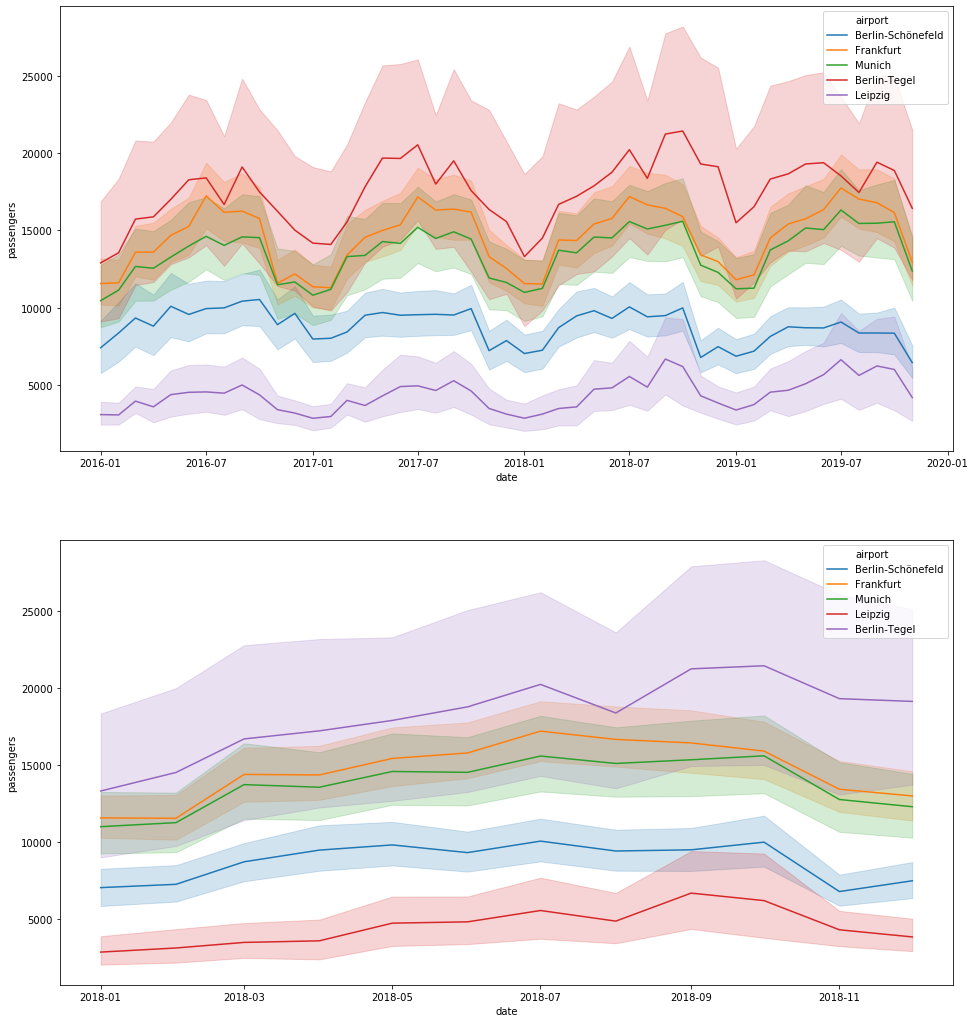

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(16,18))

df_cities_plot = df_cities_3y.copy()
sns.lineplot(x=df_cities_plot['date'],
             y=df_cities_plot['passengers'], # df_cities_2018['util_rate'],
             hue=df_cities_plot['airport'],
             ax=ax[0]
            );

df_cities_plot = df_cities_2018.copy()
sns.lineplot(x=df_cities_plot['date'],
             y=df_cities_plot['passengers'], # df_cities_2018['util_rate'],
             hue=df_cities_plot['airport'],
             ax=ax[1]
            );

#### Deep-Dive: Berlin-Tegel

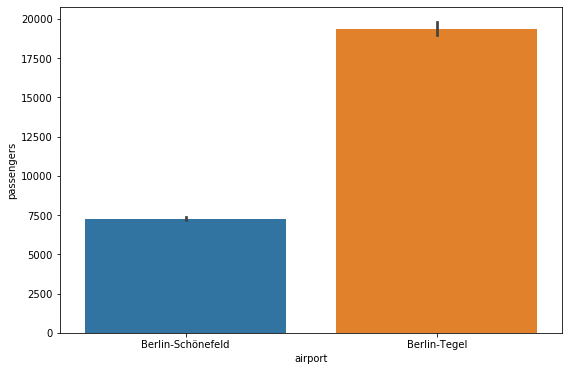

In [44]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.barplot(x=df_bln['airport'].replace(di_airports),
            y=df_bln['passengers'],
            # order=df_bln['airport'].replace(di_airports),
            ax=ax
           );

In [45]:
df_bln.head()

,route,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,distance,util_rate,domestic,airport
0,DE_EDDB_BE_EBBR,DE,EDDB,BE,EBBR,2019-11-01,47.0,8166.0,7306.0,646.455762,0.894685,0,EDDB
1,DE_EDDB_BG_LBSF,DE,EDDB,BG,LBSF,2019-11-01,26.0,4914.0,4406.0,1306.358290,0.896622,0,EDDB
2,DE_EDDB_CH_LSGG,DE,EDDB,CH,LSGG,2019-11-01,50.0,7896.0,6586.0,869.238264,0.834093,0,EDDB
3,DE_EDDB_CH_LSZM,DE,EDDB,CH,LSZM,2019-11-01,45.0,7372.0,6341.0,NaN,0.860147,0,EDDB
4,DE_EDDB_DE_EDDK,DE,EDDB,DE,EDDK,2019-11-01,8.0,64.0,14.0,472.646160,0.218750,1,EDDB


In [46]:
df_tegel = df_bln[df_bln['airport'] == 'EDDT']

In [47]:
df_tegel.head()

,route,fr_country,fr_airport,to_country,to_airport,date,num_flights,seats,passengers,distance,util_rate,domestic,airport
93,DE_EDDF_DE_EDDT,DE,EDDF,DE,EDDT,2019-11-01,656.0,120044.0,91945.0,432.567859,0.765927,1,EDDT
300,DE_EDDK_DE_EDDT,DE,EDDK,DE,EDDT,2019-11-01,449.0,72411.0,56196.0,464.455298,0.776070,1,EDDT
340,DE_EDDL_DE_EDDT,DE,EDDL,DE,EDDT,2019-11-01,424.0,66357.0,49342.0,470.137364,0.743584,1,EDDT
425,DE_EDDM_DE_EDDT,DE,EDDM,DE,EDDT,2019-11-01,626.0,103400.0,78513.0,479.823922,0.759313,1,EDDT
581,DE_EDDR_DE_EDDT,DE,EDDR,DE,EDDT,2019-11-01,75.0,5250.0,3200.0,571.905547,0.609524,1,EDDT


In [48]:
df_tegel_2 = df_tegel.loc[df_tegel['to_airport'] != 'EDDT']

In [49]:
df_tegel_2.shape

(8049, 13)

In [52]:
df_geo[df_geo['city'] == 'London']

,airport_id,name,city,country,iata,icao,latitude,longitude,altitude,timezone
172,174,London Airport,London,Canada,YXU,CYXU,43.035599,-81.153900,912,-5
487,492,London Luton Airport,London,United Kingdom,LTN,EGGW,51.874699,-0.368333,526,0
497,502,London Gatwick Airport,London,United Kingdom,LGW,EGKK,51.148102,-0.190278,202,0
498,503,London City Airport,London,United Kingdom,LCY,EGLC,51.505299,0.055278,19,0
502,507,London Heathrow Airport,London,United Kingdom,LHR,EGLL,51.470600,-0.461941,83,0
542,548,London Stansted Airport,London,United Kingdom,STN,EGSS,51.884998,0.235000,348,0
5766,7722,London Heliport,London,United Kingdom,\N,EGLW,51.469723,-0.179444,18,0
6141,8410,London-Corbin Airport/Magee Field,London,United States,LOZ,KLOZ,37.082199,-84.084900,1212,-5
6759,10169,Madison County Airport,London,United States,\N,KUYF,39.932701,-83.461998,1082,-5


In [53]:
di_all_airports = pd.Series(df_geo['city'].values, index=df_geo['icao']).to_dict()

In [54]:
di_all_airports

{'AYGA': 'Goroka',
 'AYMD': 'Madang',
 'AYMH': 'Mount Hagen',
 'AYNZ': 'Nadzab',
 'AYPY': 'Port Moresby',
 'AYWK': 'Wewak',
 'BGBW': 'Narssarssuaq',
 'BGGH': 'Godthaab',
 'BGSF': 'Sondrestrom',
 'BGTL': 'Thule',
 'BIAR': 'Akureyri',
 'BIEG': 'Egilsstadir',
 'BIHN': 'Hofn',
 'BIHU': 'Husavik',
 'BIIS': 'Isafjordur',
 'BIKF': 'Keflavik',
 'BIPA': 'Patreksfjordur',
 'BIRK': 'Reykjavik',
 'BISI': 'Siglufjordur',
 'BIVM': 'Vestmannaeyjar',
 'CYAM': 'Sault Sainte Marie',
 'CYAV': 'Winnipeg',
 'CYAW': 'Halifax',
 'CYAY': 'St. Anthony',
 'CYAZ': 'Tofino',
 'CYBB': 'Pelly Bay',
 'CYBC': 'Baie Comeau',
 'CYBG': 'Bagotville',
 'CYBK': 'Baker Lake',
 'CYBL': 'Campbell River',
 'CYBR': 'Brandon',
 'CYCB': 'Cambridge Bay',
 'CYCD': 'Nanaimo',
 'CYCG': 'Castlegar',
 'CYCH': 'Chatham',
 'CYCL': 'Charlo',
 'CYCO': 'Coppermine',
 'CYCT': 'Coronation',
 'CYCW': 'Chilliwack',
 'CYCY': 'Clyde River',
 'CYZS': 'Coral Harbour',
 'CYDA': 'Dawson',
 'CYDB': 'Burwash',
 'CYDC': 'Princeton',
 'CYDF': 'Deer Lake'

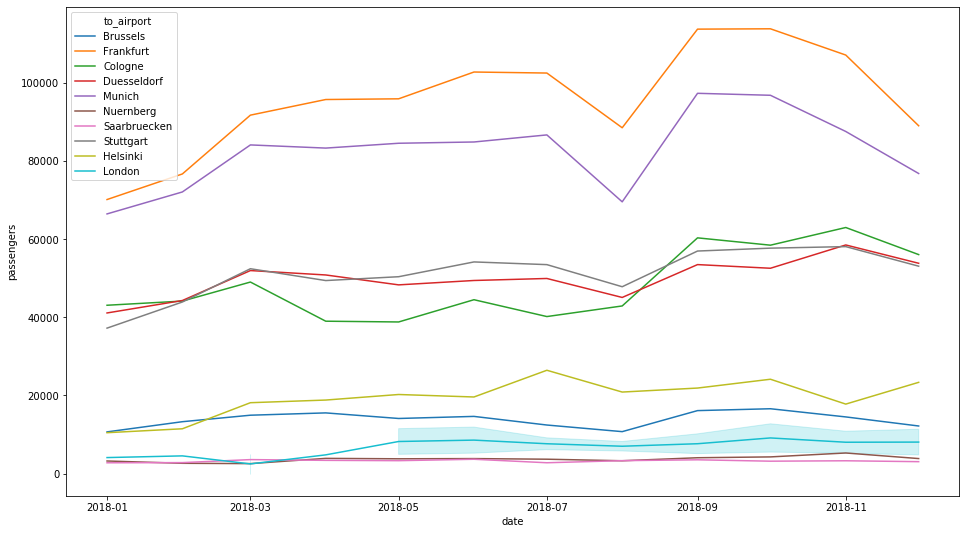

In [55]:
fig, ax = plt.subplots(figsize=(16, 9))

df_plot = df_tegel_2[df_tegel_2['date'].dt.year == 2018].copy()
df_plot = df_plot.groupby(['to_airport', 'date']).sum().head(129).reset_index()

sns.lineplot(x=df_plot['date'],
            y=df_plot['passengers'],
            hue=df_plot['to_airport'].replace(di_all_airports),
            ax=ax
           );